In [1]:
!pip install opendatasets
!pip install pandas

In [2]:
import opendatasets as od
import pandas

od.download(
    "https://www.kaggle.com/datasets/vipoooool/new-plant-diseases-dataset")

Skipping, found downloaded files in "./new-plant-diseases-dataset" (use force=True to force download)


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
# /content/new-plant-diseases-dataset/new plant diseases dataset(augmented)

In [5]:
# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Import necessary libraries
import tensorflow as tf  # TensorFlow for machine learning tasks
import seaborn as sns    # Seaborn for statistical visualization
import matplotlib.pyplot as plt  # Matplotlib for plotting
from tensorflow import keras     # Keras for building neural networks
import numpy as np      # NumPy for numerical computations
import os              # OS module for interacting with the operating system
import pandas as pd    # Pandas for data manipulation and analysis
import itertools       # Itertools for creating iterators
from tensorflow.keras.utils import image_dataset_from_directory  # Utility for loading image datasets
from tensorflow.keras.layers import BatchNormalization, Dropout   # Layers for neural networks
from sklearn.metrics import precision_score, accuracy_score, recall_score, confusion_matrix, ConfusionMatrixDisplay  # Metrics for model evaluation
from tensorflow.keras.preprocessing import image   # Utility for image preprocessing

In [6]:
import os
import shutil
from sklearn.model_selection import train_test_split

# Đường dẫn tới thư mục gốc
base_dir = "/content/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train"
train_dir = "/content/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/split/train"
valid_dir = "/content/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/split/valid"

# Tạo các thư mục đích nếu chưa tồn tại
os.makedirs(train_dir, exist_ok=True)
os.makedirs(valid_dir, exist_ok=True)

# Lặp qua từng lớp trong thư mục gốc
for class_name in os.listdir(base_dir):
    class_path = os.path.join(base_dir, class_name)
    if os.path.isdir(class_path):
        # Lấy danh sách tất cả các ảnh trong lớp
        images = [os.path.join(class_path, img) for img in os.listdir(class_path) if os.path.isfile(os.path.join(class_path, img))]

        # Tách thành train và val
        train_images, val_images = train_test_split(images, test_size=0.2, random_state=42)

        # Tạo các thư mục tương ứng cho lớp trong train và val
        train_class_dir = os.path.join(train_dir, class_name)
        val_class_dir = os.path.join(valid_dir, class_name)
        os.makedirs(train_class_dir, exist_ok=True)
        os.makedirs(val_class_dir, exist_ok=True)

        # Di chuyển hoặc sao chép các ảnh vào thư mục tương ứng
        for img in train_images:
            shutil.copy(img, train_class_dir)
        for img in val_images:
            shutil.copy(img, val_class_dir)


In [7]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   fill_mode='nearest',
                                   )

valid_datagen = ImageDataGenerator(rescale=1./255)

test_datagen = ImageDataGenerator(rescale=1./255)

In [8]:
height_image = 90
width_image = 90
batch_size =128

In [19]:
#Loading the data..^_^
base_dir = "/content/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)"

val_url= "/content/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/split/valid"
# Define the paths to the training and validation datasets
# train_url = base_dir + "\\train"
# valid_url = base_dir + "\\valid"

train_set = train_datagen.flow_from_directory(base_dir + '/split/train',
                                              target_size=(height_image, width_image),
                                              batch_size=batch_size,
                                              class_mode='categorical',
                                              )  # Use 80% for training

val_set = valid_datagen.flow_from_directory(val_url,
                                            target_size=(height_image, width_image),
                                            batch_size=batch_size,
                                            class_mode='categorical',
                                            )  # Use 20% for validation


test_set = test_datagen.flow_from_directory(base_dir + '/valid',
                                             target_size=(height_image, width_image),
                                             batch_size=batch_size,
                                             class_mode='categorical')

Found 56219 images belonging to 38 classes.
Found 14076 images belonging to 38 classes.
Found 17572 images belonging to 38 classes.


In [20]:
class_dict = train_set.class_indices
print(class_dict)

{'Apple___Apple_scab': 0, 'Apple___Black_rot': 1, 'Apple___Cedar_apple_rust': 2, 'Apple___healthy': 3, 'Blueberry___healthy': 4, 'Cherry_(including_sour)___Powdery_mildew': 5, 'Cherry_(including_sour)___healthy': 6, 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot': 7, 'Corn_(maize)___Common_rust_': 8, 'Corn_(maize)___Northern_Leaf_Blight': 9, 'Corn_(maize)___healthy': 10, 'Grape___Black_rot': 11, 'Grape___Esca_(Black_Measles)': 12, 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)': 13, 'Grape___healthy': 14, 'Orange___Haunglongbing_(Citrus_greening)': 15, 'Peach___Bacterial_spot': 16, 'Peach___healthy': 17, 'Pepper,_bell___Bacterial_spot': 18, 'Pepper,_bell___healthy': 19, 'Potato___Early_blight': 20, 'Potato___Late_blight': 21, 'Potato___healthy': 22, 'Raspberry___healthy': 23, 'Soybean___healthy': 24, 'Squash___Powdery_mildew': 25, 'Strawberry___Leaf_scorch': 26, 'Strawberry___healthy': 27, 'Tomato___Bacterial_spot': 28, 'Tomato___Early_blight': 29, 'Tomato___Late_blight': 30, 'Tomato

In [21]:
# get index
index_to_class = {v: k for k, v in class_dict.items()}
index_to_class

{0: 'Apple___Apple_scab',
 1: 'Apple___Black_rot',
 2: 'Apple___Cedar_apple_rust',
 3: 'Apple___healthy',
 4: 'Blueberry___healthy',
 5: 'Cherry_(including_sour)___Powdery_mildew',
 6: 'Cherry_(including_sour)___healthy',
 7: 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 8: 'Corn_(maize)___Common_rust_',
 9: 'Corn_(maize)___Northern_Leaf_Blight',
 10: 'Corn_(maize)___healthy',
 11: 'Grape___Black_rot',
 12: 'Grape___Esca_(Black_Measles)',
 13: 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 14: 'Grape___healthy',
 15: 'Orange___Haunglongbing_(Citrus_greening)',
 16: 'Peach___Bacterial_spot',
 17: 'Peach___healthy',
 18: 'Pepper,_bell___Bacterial_spot',
 19: 'Pepper,_bell___healthy',
 20: 'Potato___Early_blight',
 21: 'Potato___Late_blight',
 22: 'Potato___healthy',
 23: 'Raspberry___healthy',
 24: 'Soybean___healthy',
 25: 'Squash___Powdery_mildew',
 26: 'Strawberry___Leaf_scorch',
 27: 'Strawberry___healthy',
 28: 'Tomato___Bacterial_spot',
 29: 'Tomato___Early_blight',
 30: '

In [22]:
train_num = train_set.samples
valid_num = val_set.samples
train_num, valid_num

(56219, 14076)

In [23]:
# Count the number of images in each class for the training set
train_class_counts = {class_name: (train_set.classes == class_index).sum() for class_name, class_index in train_set.class_indices.items()}

# Count the number of images in each class for the validation set
valid_class_counts = {class_name: (val_set.classes == class_index).sum() for class_name, class_index in val_set.class_indices.items()}

# Count the number of images in each class for the validation set
test_class_counts = {class_name: (test_set.classes == class_index).sum() for class_name, class_index in test_set.class_indices.items()}

# Convert the counts to lists for plotting
train_labels, train_counts = zip(*train_class_counts.items())
valid_labels, valid_counts = zip(*valid_class_counts.items())
test_labels, test_counts = zip(*test_class_counts.items())

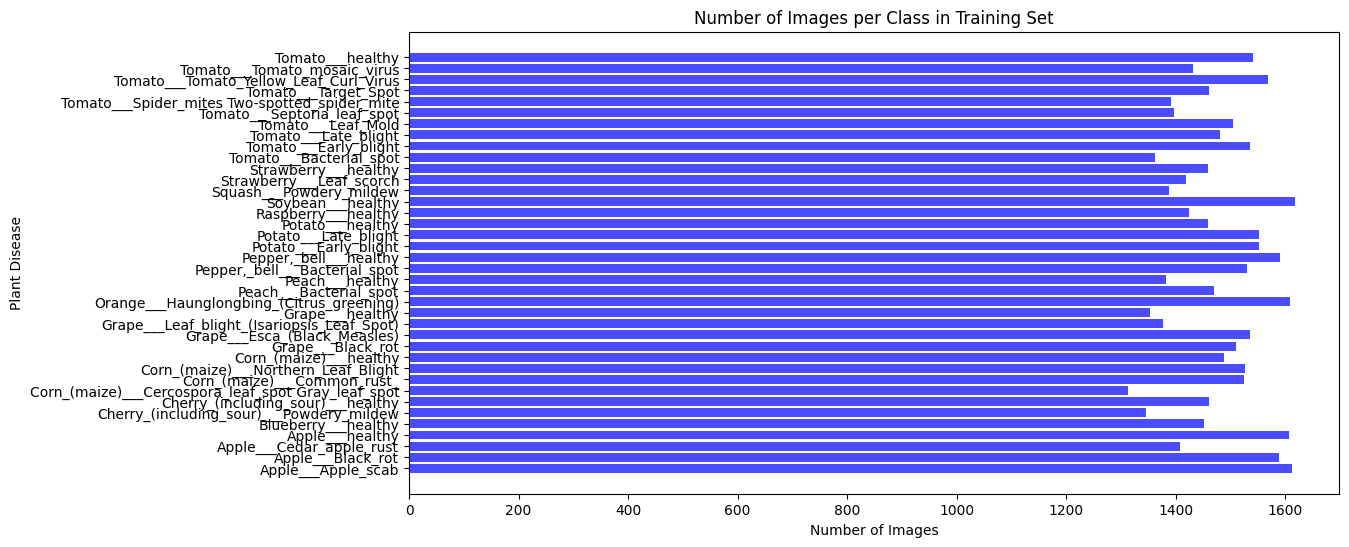

In [24]:
# Plot for training set
plt.figure(figsize=(12, 6))
plt.barh(train_labels, train_counts, color='blue', alpha=0.7)  # Horizontal bar plot
plt.xlabel('Number of Images')
plt.ylabel('Plant Disease')
plt.title('Number of Images per Class in Training Set')
plt.show()


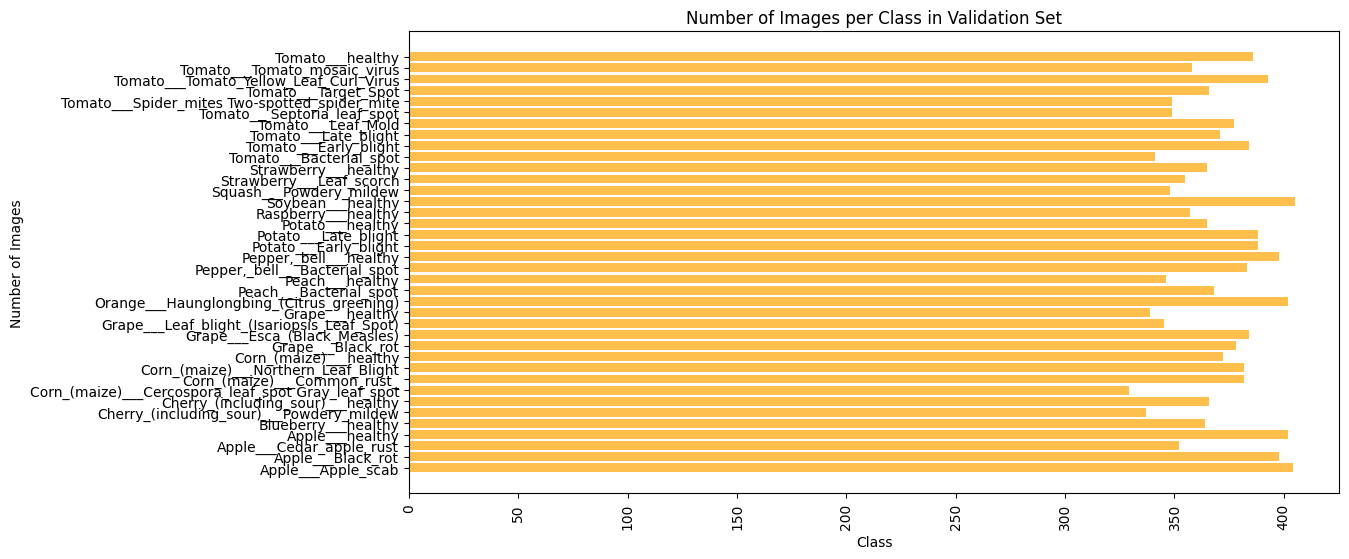

In [25]:
# Plot for validation set
plt.figure(figsize=(12, 6))
plt.barh(valid_labels, valid_counts, color='orange', alpha=0.7)
plt.xlabel('Class')
plt.ylabel('Number of Images')
plt.title('Number of Images per Class in Validation Set')
plt.xticks(rotation=90)
plt.show()

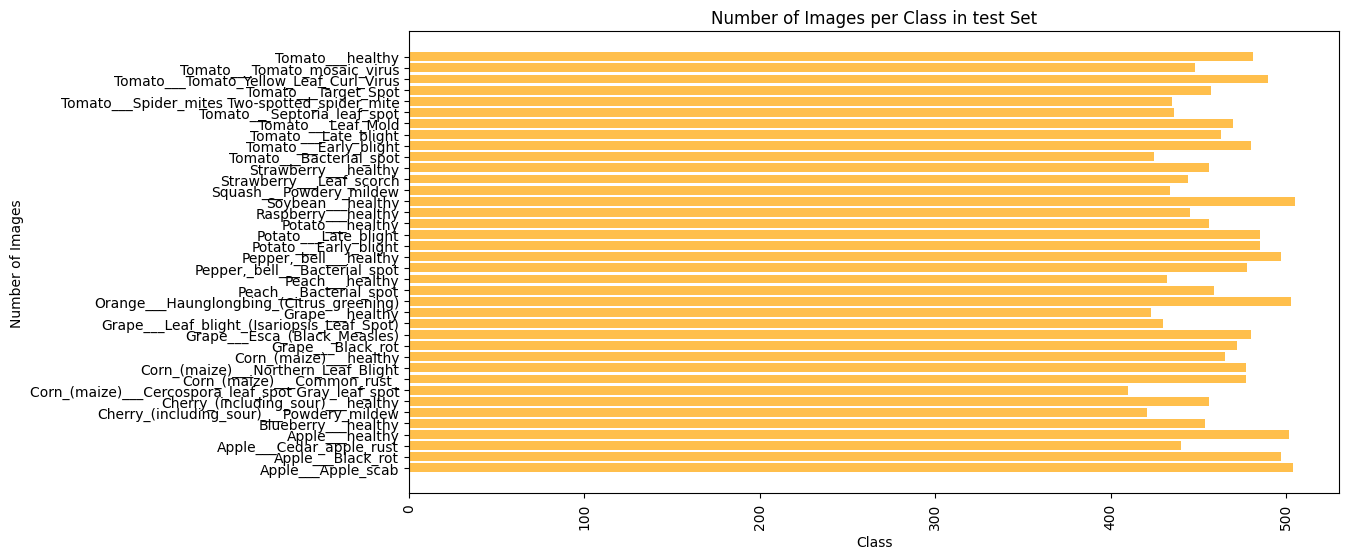

In [26]:
# Plot for validation set
plt.figure(figsize=(12, 6))
plt.barh(test_labels, test_counts, color='orange', alpha=0.7)
plt.xlabel('Class')
plt.ylabel('Number of Images')
plt.title('Number of Images per Class in test Set')
plt.xticks(rotation=90)
plt.show()

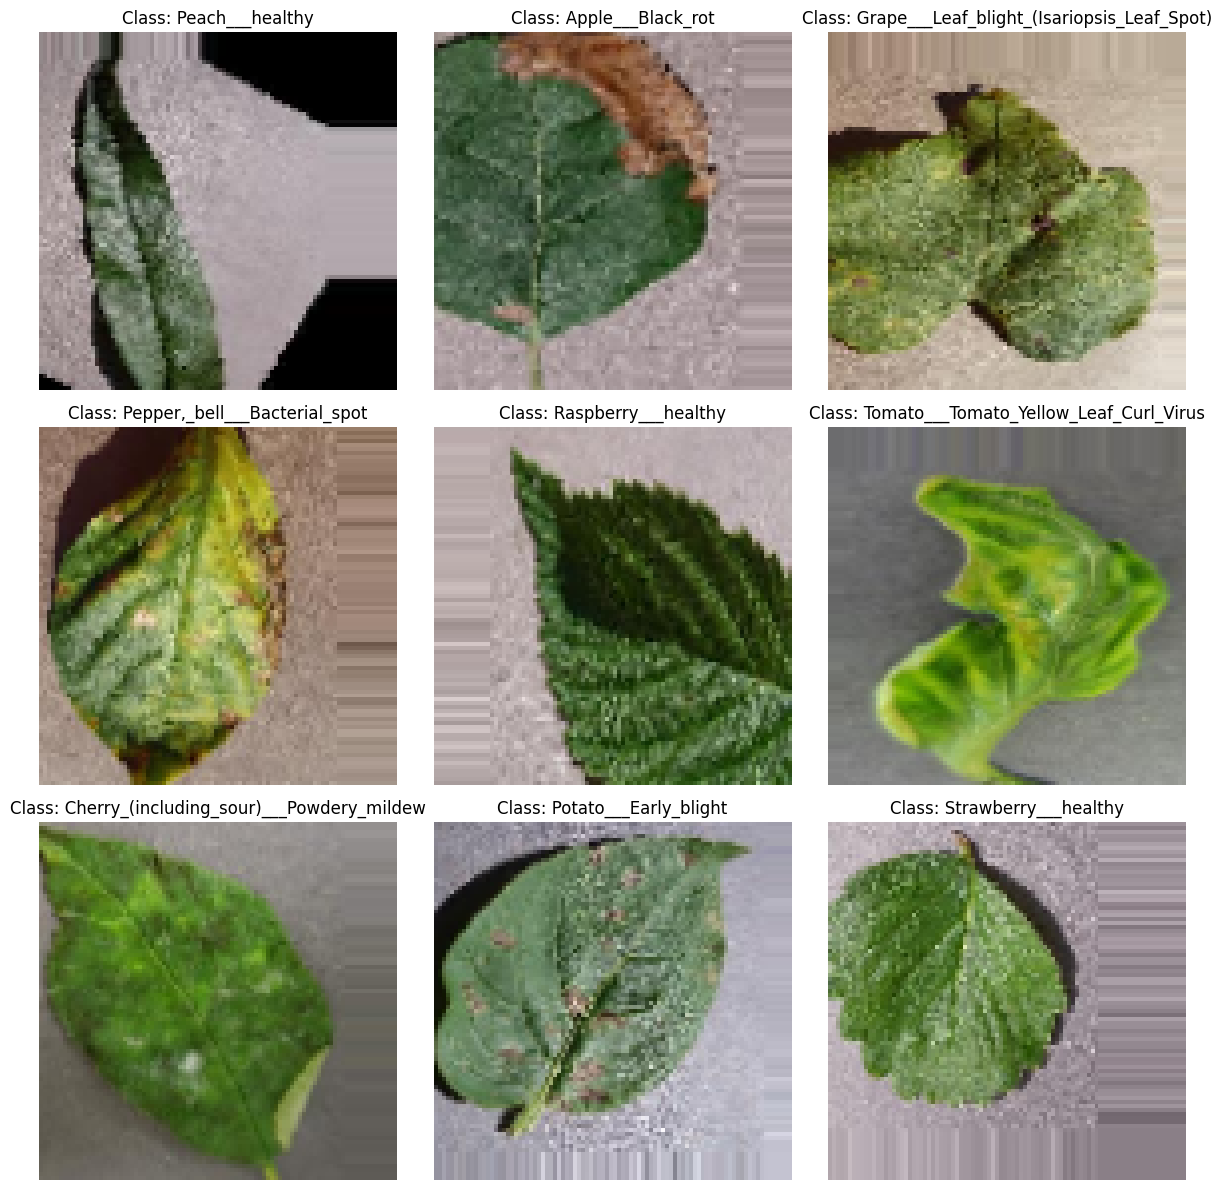

In [27]:
import matplotlib.pyplot as plt

# Lấy một batch ảnh và nhãn từ train_set
batch_images, batch_labels = train_set.next()

# Số lượng ảnh muốn in ra
num_images_to_print = 9

# Tạo figure
fig, axes = plt.subplots(3, 3, figsize=(12, 12))

for i in range(num_images_to_print):
    ax = axes[i // 3, i % 3]  # Tính toán vị trí của subplot
    ax.imshow(batch_images[i])
    label_index = np.argmax(batch_labels[i])
    label_name = list(train_set.class_indices.keys())[label_index]
    ax.set_title(f"Class: {label_name}")
    ax.axis('off')  # Ẩn trục

plt.tight_layout()
plt.show()


In [28]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.layers import Conv2D, Dense, Flatten, MaxPooling2D, Input, BatchNormalization, ReLU, Add, AveragePooling2D, Activation
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical

In [29]:
model = Sequential([
        layers.Input(shape = (height_image, width_image,3)),
        layers.Conv2D(filters=64,kernel_size=(3,3),padding='same',activation='relu'),layers.BatchNormalization(),
        layers.Conv2D(filters=64,kernel_size=(3,3),padding='same',activation='relu'),layers.BatchNormalization(),
        layers.MaxPooling2D((2,2)),
        layers.Conv2D(filters=128,kernel_size=(3,3),padding='same',activation='relu'),layers.BatchNormalization(),
        layers.Conv2D(filters=128,kernel_size=(3,3),padding='same',activation='relu'),layers.BatchNormalization(),
        layers.MaxPooling2D((2,2)),
        layers.Conv2D(filters=256,kernel_size=(3,3),padding='same',activation='relu'),layers.BatchNormalization(),
        layers.Conv2D(filters=256,kernel_size=(3,3),padding='same',activation='relu'),layers.BatchNormalization(),
        layers.Conv2D(filters=256,kernel_size=(3,3),padding='same',activation='relu'),layers.BatchNormalization(),
        layers.MaxPooling2D((2,2)),
        layers.Conv2D(filters=512,kernel_size=(3,3),padding='same',activation='relu'),layers.BatchNormalization(),
        layers.Conv2D(filters=512,kernel_size=(3,3),padding='same',activation='relu'),layers.BatchNormalization(),
        layers.Conv2D(filters=512,kernel_size=(3,3),padding='same',activation='relu'),layers.BatchNormalization(),
        layers.MaxPooling2D((2,2)),
        layers.Conv2D(filters=512,kernel_size=(3,3),padding='same',activation='relu'),layers.BatchNormalization(),
        layers.Conv2D(filters=512,kernel_size=(3,3),padding='same',activation='relu'),layers.BatchNormalization(),
        layers.Conv2D(filters=512,kernel_size=(3,3),padding='same',activation='relu'),layers.BatchNormalization(),
        layers.MaxPooling2D((2,2)),
        layers.Flatten(),
        layers.Dense(4096,activation="relu"),
        Dropout(0.5),
        layers.Dense(4096,activation="relu"),
        Dropout(0.5),
        layers.Dense(38,activation="softmax")
    ])

In [30]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [31]:
callback_1 = ModelCheckpoint(
    '/content/drive/MyDrive/Demo classify plant disease/model_checkpoint/weights-improvement-{epoch:02d}-{val_accuracy:.2f}.h5', # Tên model tại mỗi điểm checkpoint
    monitor='val_accuracy', # Giá trị cần theo dõi
    save_best_only=True, # Chỉ lưu những model tốt nhất đến thời điểm checkpoint
    save_weights_only=True, # Chỉ lưu weights của model (để giảm kích thước)
    save_freq='epoch', # Checkpoint sau mỗi epoch
    mode='auto', # val_accuracy phải tăng mới tính là model được cải thiện. Nếu monitor='loss/val_loss' thì nó phải giảm mới tính là model được cải thiện
    verbose=1 # Hiển thị thông tin model lúc checkpoint
)

In [32]:
callback_2 = EarlyStopping(monitor='val_loss', patience=5)

In [33]:
opt = keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=opt,loss="categorical_crossentropy",metrics=['accuracy'])
# model.summary()

In [34]:
# model.summary()

In [35]:
history = model.fit(
    train_set,
    validation_data=val_set,
    epochs=30,
    batch_size=256,
    callbacks=[],
    verbose=1
)

Epoch 1/30
440/440 [==============================] - 279s 576ms/step - loss: 1.6535 - accuracy: 0.5307 - val_loss: 6.1904 - val_accuracy: 0.1093
Epoch 2/30
440/440 [==============================] - 245s 557ms/step - loss: 0.6962 - accuracy: 0.7835 - val_loss: 1.6464 - val_accuracy: 0.5904
Epoch 3/30
440/440 [==============================] - 245s 557ms/step - loss: 0.4727 - accuracy: 0.8505 - val_loss: 1.0578 - val_accuracy: 0.7202
Epoch 4/30
440/440 [==============================] - 245s 557ms/step - loss: 0.3522 - accuracy: 0.8863 - val_loss: 1.0036 - val_accuracy: 0.7748
Epoch 5/30
440/440 [==============================] - 249s 565ms/step - loss: 0.2771 - accuracy: 0.9116 - val_loss: 0.7468 - val_accuracy: 0.8021
Epoch 6/30
440/440 [==============================] - 246s 559ms/step - loss: 0.2278 - accuracy: 0.9277 - val_loss: 0.4763 - val_accuracy: 0.8582
Epoch 7/30
440/440 [==============================] - 246s 558ms/step - loss: 0.1920 - accuracy: 0.9389 - val_loss: 0.7941 -

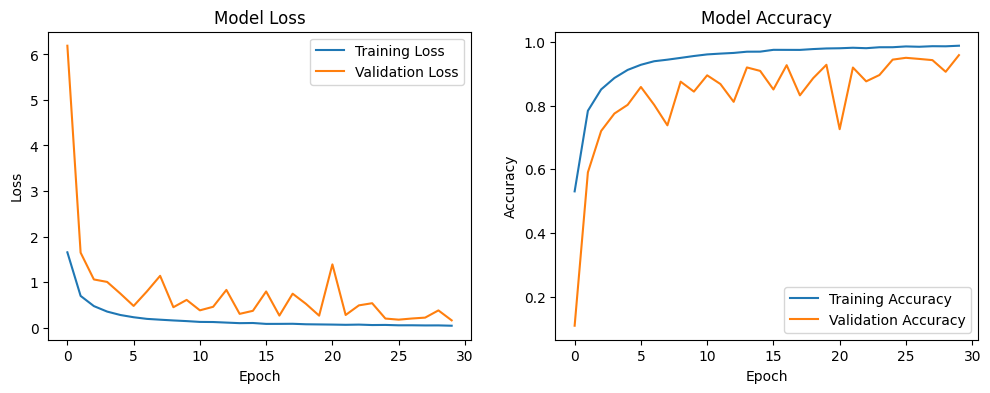

In [36]:
# Visualize the training and validation loss
plt.figure(figsize=(12, 4))

# Plot training & validation loss values
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot training & validation accuracy values
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

In [37]:
model.evaluate(test_set)

138/138 [==============================] - 28s 204ms/step - loss: 0.1749 - accuracy: 0.9529


[0.1749354898929596, 0.9529364705085754]

In [38]:

import numpy as np

# Lấy danh sách nhãn của các lớp từ test_set
class_labels = list(test_set.class_indices.keys())

# Lấy nhãn thực tế của tập test
y_true = []
num_batches = len(test_set)
for i in range(num_batches):
    _, batch_true_labels = test_set[i]
    y_true.extend(np.argmax(batch_true_labels, axis=1))  # Chuyển từ one-hot về nhãn số

y_true = np.array(y_true)
y_pred = model.predict(test_set)


138/138 [==============================] - 21s 151ms/step


<Figure size 2000x500 with 0 Axes>

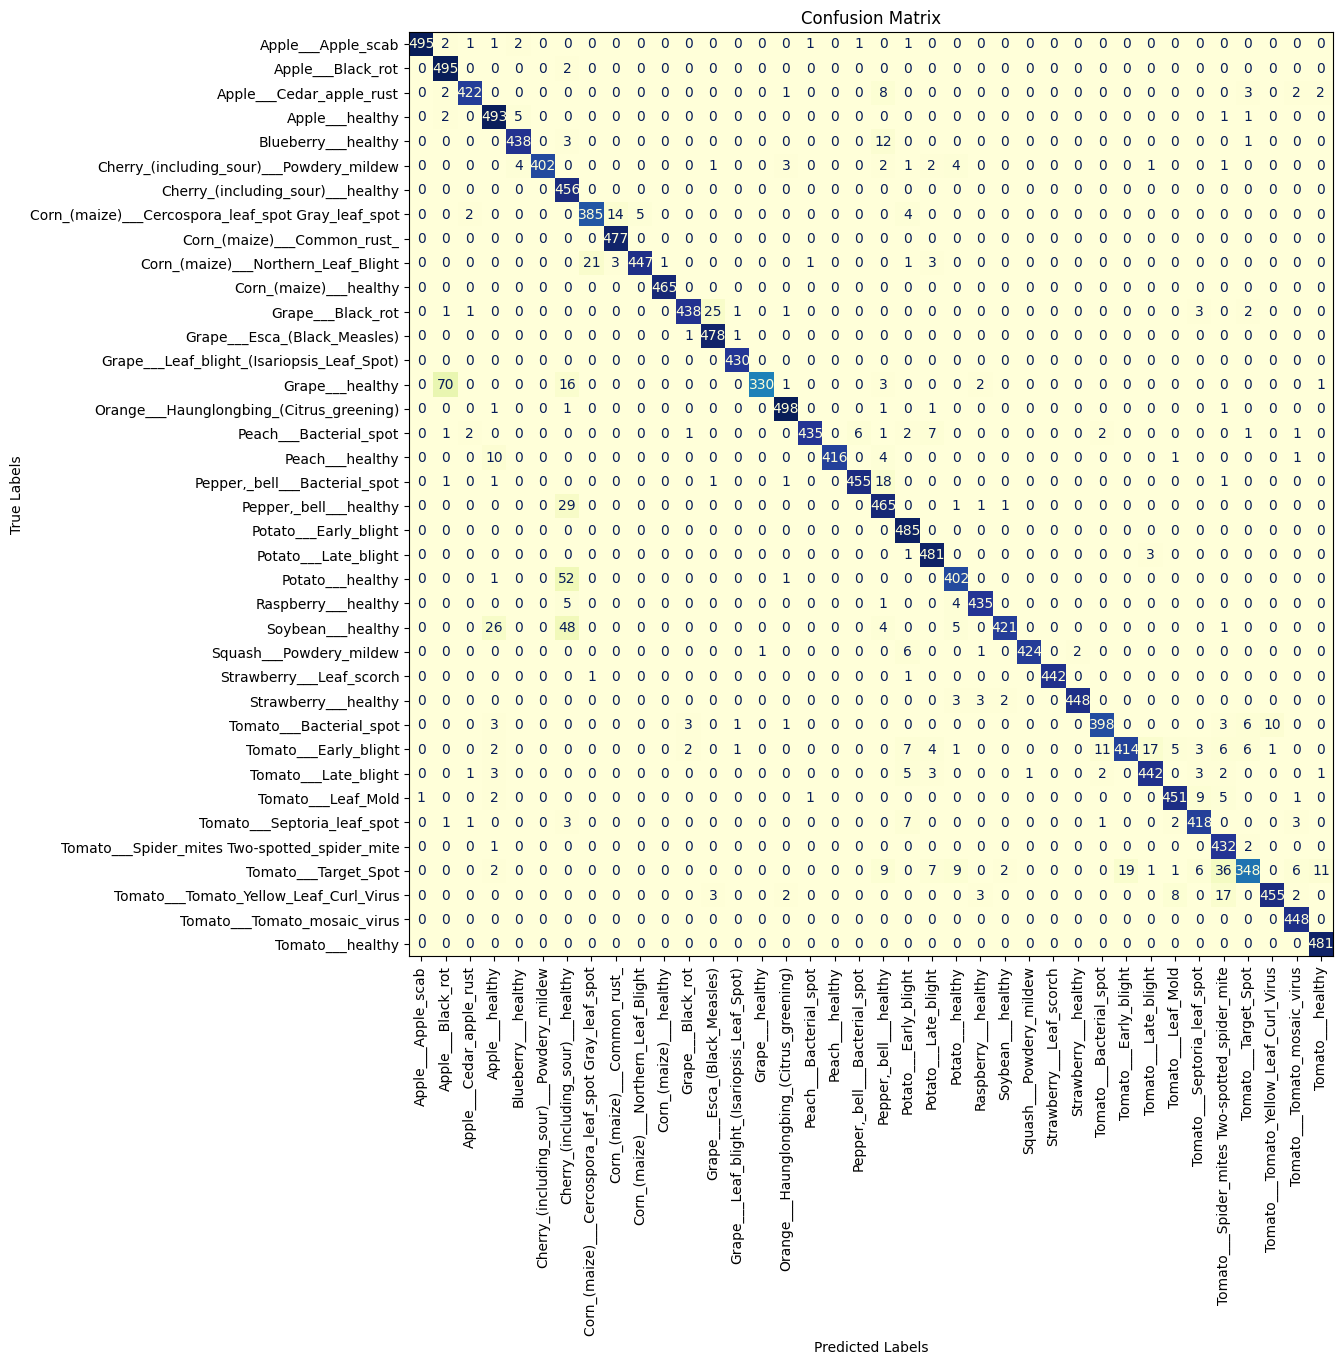

In [39]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# Plot the confusion matrix
plt.figure(figsize=(20, 5))
cm = confusion_matrix(y_true, y_pred.argmax(axis=1))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)

fig, ax = plt.subplots(figsize=(12, 12))
disp.plot(ax=ax, colorbar=False, cmap='YlGnBu')
plt.title("Confusion Matrix")
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.xticks(rotation=90)
plt.show()

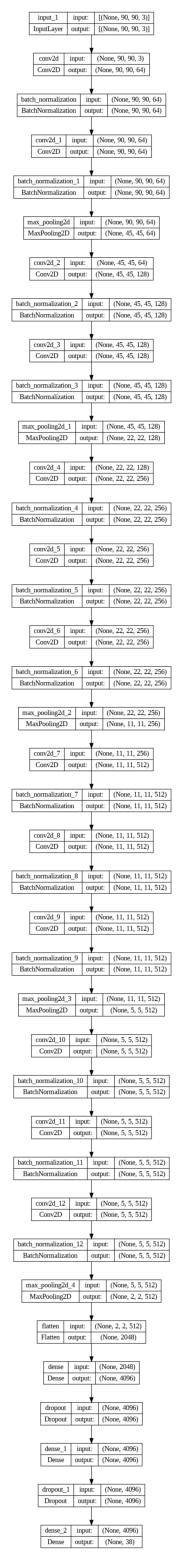

In [40]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

img = plt.imread('model_plot.png')
plt.figure(figsize=(20, 20))
plt.imshow(img)
plt.axis('off')
plt.show()


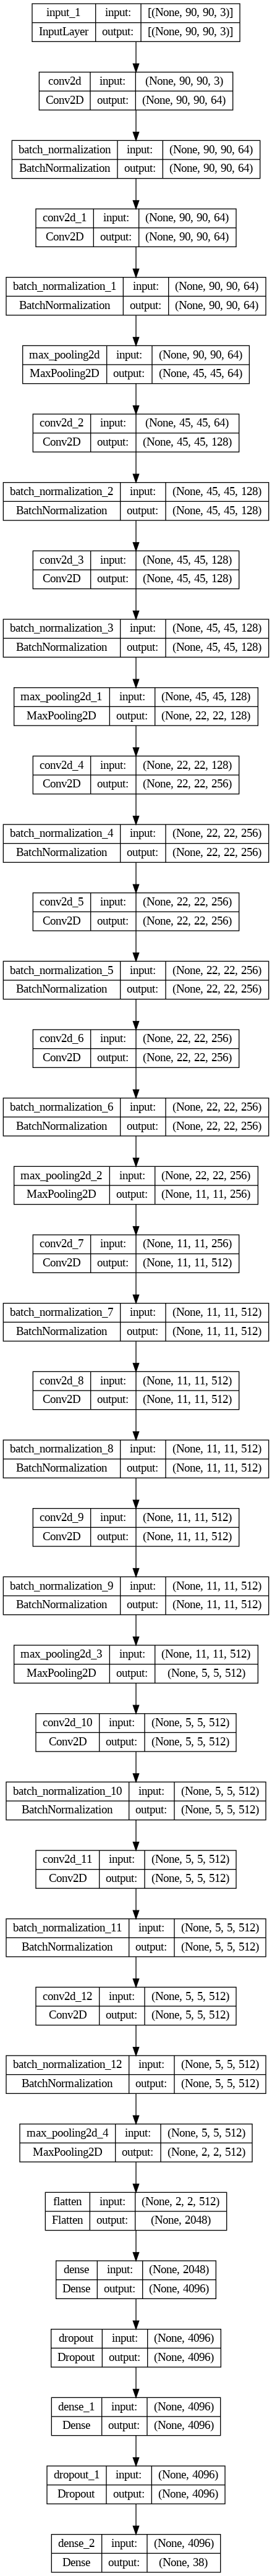

In [41]:
plot_model(model, to_file='/content/drive/MyDrive/Demo classify plant disease/model_VGG_plot.png', show_shapes=True, show_layer_names=True)

In [42]:
# y_test = label_encoder.fit_transform(y_test)
# test_loss, test_mse, test_accuracy = model.evaluate(X_test, y_test)

In [43]:
model.save('/content/drive/MyDrive/Demo classify plant disease/model/VGG16_Plant_Diseases_v3.h5')

Load model

In [44]:
from tensorflow.keras.models import load_model

model_loaded = load_model('/content/drive/MyDrive/Demo classify plant disease/model/VGG16_Plant_Diseases_v3.h5')

In [45]:
model_loaded.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 90, 90, 64)        1792      
                                                                 
 batch_normalization (Batch  (None, 90, 90, 64)        256       
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 64)        36928     
                                                                 
 batch_normalization_1 (Bat  (None, 90, 90, 64)        256       
 chNormalization)                                                
                                                                 
 max_pooling2d (MaxPooling2  (None, 45, 45, 64)        0         
 D)                                                              
                                                        

test


In [62]:
import cv2

image_path = "/content/drive/MyDrive/Demo classify plant disease/khoaitay_ch.jpg"
image = cv2.imread(image_path)
image = cv2.resize(image, (height_image, width_image))  # Resize ảnh theo kích thước mong muốn
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Chuyển đổi từ BGR sang RGB (nếu cần)
image = image / 255.0  # Chuẩn hóa pixel về khoảng [0, 1] tương tự như khi huấn luyện mô hình
image = np.expand_dims(image, axis=0)  # Mở rộng chiều để phù hợp với dạng (batch_size, height, width, channels)


In [63]:
image

array([[[[0.61960784, 0.61568627, 0.49803922],
         [0.60392157, 0.61176471, 0.47058824],
         [0.50588235, 0.53333333, 0.36078431],
         ...,
         [0.38431373, 0.38823529, 0.24313725],
         [0.32156863, 0.33333333, 0.18823529],
         [0.17254902, 0.20392157, 0.08235294]],

        [[0.61568627, 0.62745098, 0.47843137],
         [0.52156863, 0.54117647, 0.38431373],
         [0.26666667, 0.30196078, 0.12156863],
         ...,
         [0.31372549, 0.32941176, 0.18431373],
         [0.24705882, 0.26666667, 0.12156863],
         [0.11372549, 0.14117647, 0.01960784]],

        [[0.34117647, 0.37254902, 0.19215686],
         [0.22745098, 0.26666667, 0.08235294],
         [0.20392157, 0.25098039, 0.0627451 ],
         ...,
         [0.25490196, 0.27058824, 0.1254902 ],
         [0.18039216, 0.2       , 0.05490196],
         [0.09411765, 0.11764706, 0.00784314]],

        ...,

        [[0.37647059, 0.52156863, 0.10196078],
         [0.59607843, 0.7372549 , 0.38431373]

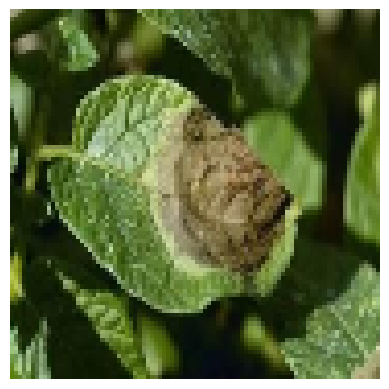

In [64]:
plt.imshow(image[0])
plt.axis('off')
plt.show()

In [65]:
prediction = model_loaded.predict(image)

1/1 [==============================] - 0s 27ms/step


In [66]:
prediction

array([[2.68638320e-08, 2.08037406e-07, 6.37366471e-09, 8.78699602e-09,
        7.04129519e-08, 8.99929091e-08, 7.51566205e-08, 2.74781198e-09,
        1.88240847e-07, 4.13753032e-09, 4.91289818e-08, 3.54985957e-10,
        2.85690205e-09, 2.78229240e-09, 1.75522263e-08, 5.91677640e-09,
        5.07465465e-08, 6.78686618e-09, 5.84710847e-07, 6.28651890e-07,
        3.04029390e-06, 1.11130282e-06, 4.45580284e-09, 6.22826324e-09,
        1.36570932e-09, 5.30742783e-09, 3.26785532e-08, 3.04018357e-08,
        1.61592020e-08, 6.04333673e-06, 9.99987245e-01, 6.81217216e-08,
        1.55654334e-07, 5.61363622e-09, 2.33308874e-08, 3.71506204e-08,
        1.38257050e-08, 1.38284735e-08]], dtype=float32)

In [67]:
prediction[0]

array([2.68638320e-08, 2.08037406e-07, 6.37366471e-09, 8.78699602e-09,
       7.04129519e-08, 8.99929091e-08, 7.51566205e-08, 2.74781198e-09,
       1.88240847e-07, 4.13753032e-09, 4.91289818e-08, 3.54985957e-10,
       2.85690205e-09, 2.78229240e-09, 1.75522263e-08, 5.91677640e-09,
       5.07465465e-08, 6.78686618e-09, 5.84710847e-07, 6.28651890e-07,
       3.04029390e-06, 1.11130282e-06, 4.45580284e-09, 6.22826324e-09,
       1.36570932e-09, 5.30742783e-09, 3.26785532e-08, 3.04018357e-08,
       1.61592020e-08, 6.04333673e-06, 9.99987245e-01, 6.81217216e-08,
       1.55654334e-07, 5.61363622e-09, 2.33308874e-08, 3.71506204e-08,
       1.38257050e-08, 1.38284735e-08], dtype=float32)

In [68]:
max_index = np.argmax(prediction[0])
max_index

30

In [69]:
index_to_class[max_index]

'Tomato___Late_blight'